In [1]:
# This is necessary to find the main code
import sys
sys.path.insert(0, '../../bomberman')
sys.path.insert(1, '..')

import pygame

# Import necessary stuff
import random
from game import Game
from monsters.stupid_monster import StupidMonster
from monsters.selfpreserving_monster import SelfPreservingMonster

# TODO This is your code!
sys.path.insert(1, '../groupNN')
from approxqcharacter import ApproxQCharacter
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time

# Create the game
random.seed() # TODO Change this if you want different random choices

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [30]:
# %%capture
ws_history = pd.DataFrame(columns=['w1', 'w2', 'w3', 'w4', 'w5', 'walls', 'monsters', 'exits'])
wall_sum, monster_sum, exit_sum = 0, 0, 0

ws = [0, 0, 0, 0, 0]
# ws = [3.61131988e+01, 4.98726940e+01, 1.05253784e+02, -9.36529652e-01, 1.14790950e+01]
epochs = 500

last_exit = 1
start = time.time()
for i in range(0, epochs):
    g = Game.fromfile('map.txt')
    g.add_monster(StupidMonster("stupid", "S", 3, 12,))
#     g.add_monster(SelfPreservingMonster("aggressive", "A", 3, 13, 2))
#     g.add_monster(SelfPreservingMonster("aggressive", "A", 3, 5, 2))

#     ours = ApproxQCharacter("me", "C", 3, 16) if i < 50 else ApproxQCharacter("me", "C", 0, 0)
    ours = ApproxQCharacter("me", "C", 3, 15)
    old_ws = ws
    ours.ws = ws

    g.add_character(ours)

    while not g.done():
        (g.world, g.events) = g.world.next()
        pygame.event.clear()
        g.world.next_decisions()

    ws = ws if not last_exit else old_ws
#     ws = ours.ws
    print(last_exit)
    last_exit = ours.exitSuccess
    exit_sum += ours.exitSuccess
    monster_sum += ours.monsterKilled
    wall_sum += ours.wallExploded
    
    

#     g.go(1)

    ws_history = ws_history.append({'w1': ws[0], 'w2': ws[1], 'w3': ws[2], 'w4': ws[3], 'w5': ws[4], 'walls': wall_sum, 'monsters': monster_sum, 'exits': exit_sum}, ignore_index=True)
end = time.time()   

1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
2
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0


1.2445613821347554


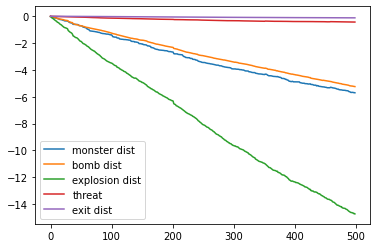

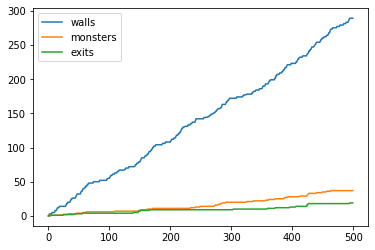

total bombs: 8295.0
19.0/500 = 0.038
[-5.70289084e+00 -5.24063484e+00 -1.47276479e+01 -4.32562735e-01
 -1.19337459e-01  2.89000000e+02  3.70000000e+01  1.90000000e+01]


In [31]:
print((end - start)/60)

plt.plot(ws_history['w1'], label='monster dist')
plt.plot(ws_history['w2'], label='bomb dist')
plt.plot(ws_history['w3'], label='explosion dist')
plt.plot(ws_history['w4'], label='threat')
plt.plot(ws_history['w5'], label='exit dist')
plt.legend()
plt.show()

plt.plot(ws_history['walls'], label='walls')
plt.plot(ws_history['monsters'], label='monsters')
plt.plot(ws_history['exits'], label='exits')
plt.legend()
plt.show()

# g.world.printit()

print(f"total bombs: {ws_history['monsters'].sum()}")
print(f"{np.array(ws_history['exits'])[-1]}/{epochs} = {np.array(ws_history['exits'])[-1]/epochs}")
print(np.array(ws_history)[-1])